# TinyML - Random Forest (Regressor)

In [1]:
#!pip install micromlgen

## 1. Importing libraries

In [2]:
from micromlgen import port
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from six import StringIO
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

## 2. Load Dataset

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [3]:
boston = load_boston()
X, y = boston.data, boston.target

In [4]:
print('Input shape: ', X.shape)
print('Target variable shape: ', y.shape)

Input shape:  (506, 13)
Target variable shape:  (506,)


In [5]:
print(X[:3])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


In [6]:
print(y[:3])

[24.  21.6 34.7]


## 3. Split into training and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## 4. Create the regressor model

In [8]:
model = RandomForestRegressor(n_estimators = 10, bootstrap = True, oob_score = False)

## 5. Train the model

In [9]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

## 6. Visualization of a single random forest tree

In [10]:
n_estimators = len(model.estimators_)
print('n_estimators: ', n_estimators)

n_estimators:  10


In [11]:
estimator = 1 # Extract single tree
estimator = model.estimators_[estimator]

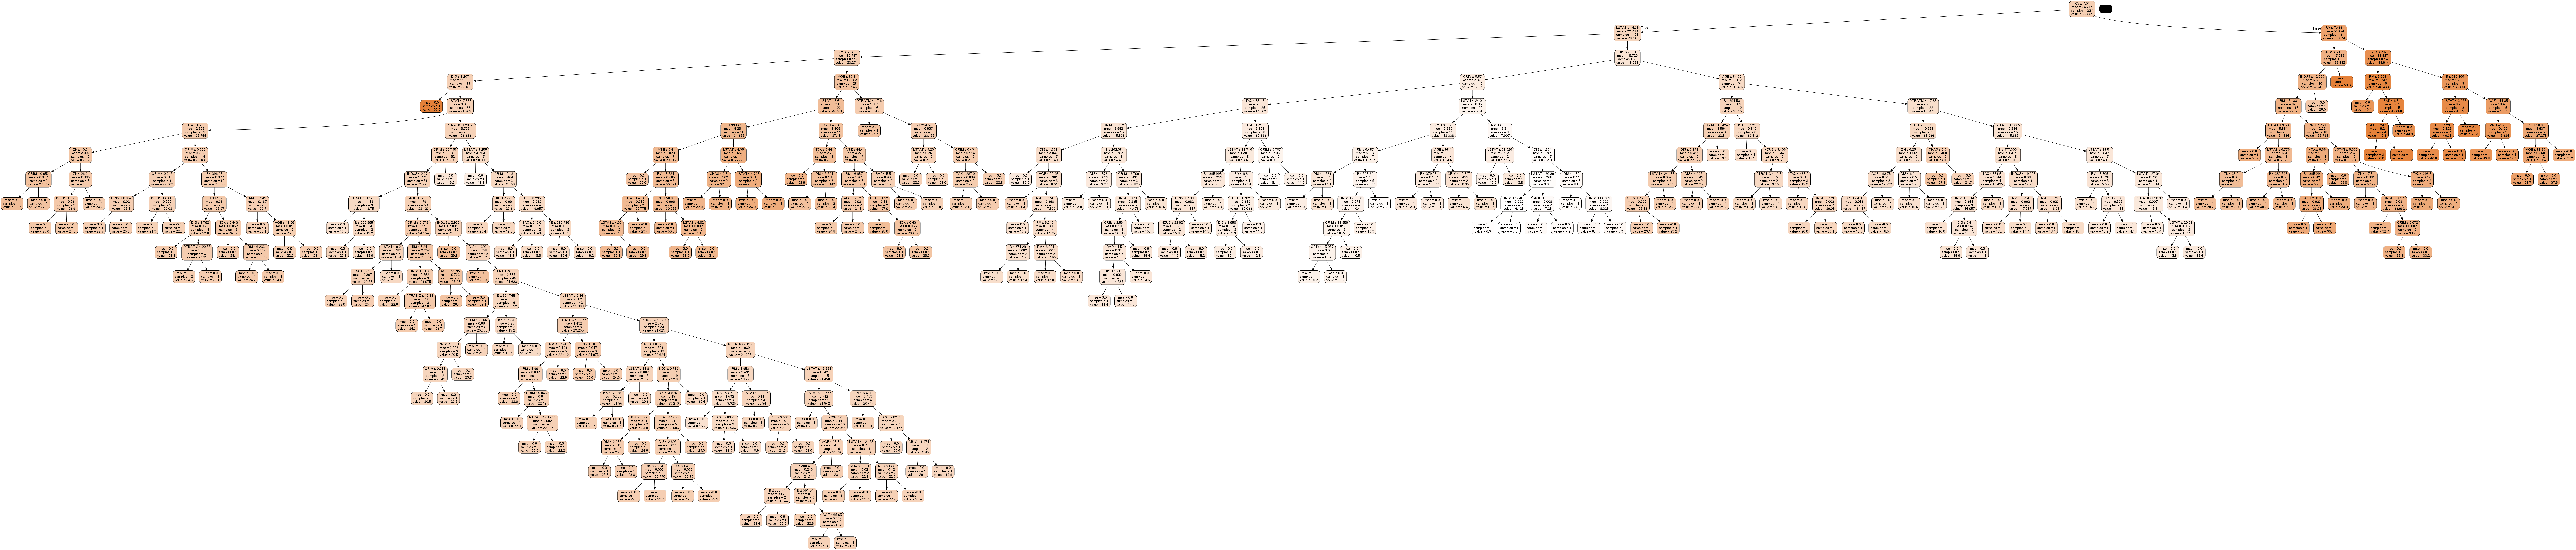

In [12]:
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_forest_regressor.png')
Image(graph.create_png())


## 7 Evaluating the model with the training data

In [13]:
score = model.score(X_train, y_train)
training_predict = model.predict(X_train)
mse = mean_squared_error(y_train, training_predict)


In [14]:
print("R-squared:", score)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

R-squared: 0.9605756337039905
MSE:  3.4652649717514126
RMSE:  1.7326324858757063


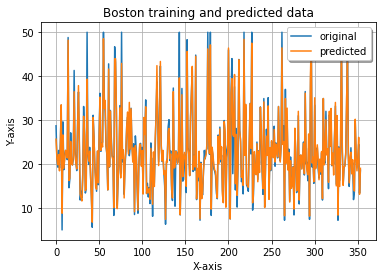

In [15]:
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, label="original")
plt.plot(x_ax, training_predict, label="predicted")
plt.title("Boston training and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## 8. Evaluating the model with test data

In [16]:
score = model.score(X_test, y_test)
test_predict = model.predict(X_test)
mse = mean_squared_error(y_test, test_predict)

In [17]:
print("R-squared:", score)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

R-squared: 0.8555050795603703
MSE:  10.766763815789474
RMSE:  5.383381907894737


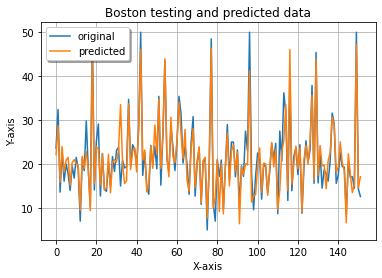

In [18]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, test_predict, label="predicted")
plt.title("Boston testing and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## 9. Obtaining the model to be implemented in the microcontroller

In [19]:
print(port(model))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForestRegressor {
                public:
                    /**
                    * Predict class for features vector
                    */
                    float predict(float *x) {
                        float y_pred = 0;
                        // tree #1
                        if (x[5] <= 6.825000047683716) {
                            if (x[12] <= 19.229999542236328) {
                                if (x[7] <= 1.3848499655723572) {
                                    if (x[0] <= 10.109175205230713) {
                                        y_pred += 50.0;
                                    }

                                    else {
                                        y_pred += 27.9;
                                    }
                                }

                                else {
                                    if (x[12] <= 

## 10. Saves the template in a .h file

In [20]:
with open('random_forest_regressor.h', 'w') as file:
    file.write(port(model))